In [93]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import patches
from cmath import rect
from matplotlib.colors import ListedColormap

import os
%matplotlib inline

def load_file_paths(base_dir):
    file_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file == "chemical_and_SN_evolution.txt":
                file_paths.append(os.path.join(root, file))
    return file_paths

def load_data_with_names(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {}
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):
            row_name = line[1:].strip()
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data
    return data_dict

def recalculate(logCO, logOH):
    logCO = [i - 0.26 for i in logCO]
    logOH = [i + 8.696 for i in logOH]
    return logCO, logOH

def plot_Berg_comparison():
    path = "/Users/adriana_work/Desktop/galIMF/Berg paper stolen plots/carbon model.txt"
    data = np.loadtxt(path, delimiter=',')
    OH = data[:, 0]
    CO = data[:, 1]
    plt.plot(OH, CO, color='tab:red', lw=1.5, label='Nicholls+2017', linestyle='-.')

def plot_Cameron_carbon():
    xmin, xmax = 7.62, 8.02
    ymin, ymax = -0.78, 0.18
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, facecolor='magenta',
                         alpha=0.25, zorder=0)
    plt.gca().add_patch(rect)
    rect1 = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, edgecolor='magenta', facecolor='none',
                         alpha=1, linestyle='--', zorder=0)
    plt.gca().add_patch(rect1)
    # plt.plot([7.82, 7.92], [-0.25, 0.25], color='purple', linestyle=':', linewidth=2, marker=None)
    plt.text(7.75, - 0.2, 'GN-z11', color='purple', ha='center', va='bottom', fontsize=12, rotation=90, weight="bold")
    plt.text(7.87, - 0.2, 'Cameron+23', color='purple', ha='center', va='bottom', fontsize=11, rotation=90)

def plot_high_redshift_data_Ji25():
    # Define data points: (12+O/H, C/O, label, color, err_x, err_y, z)
    cmap = plt.get_cmap('tab20')
    points = [
        # (8.38, -, 'Mrk 996 (high density)', cmap(0), 0.075, 0.28),
        (8.36, -0.22, 'Mrk 996 (low density)', 0.225, 0.25, 0.00544),
        (8.03, -0.51, 'LyC (high density)', 0.06, 0.05, 2.37),
        # (8.00, -, 'ID150880', cmap(4), 0.10, 0.15),
        ((7.15+7.67)/2, -0.06, 'UNCOvER-45924', 7.67-((7.15+7.67)/2), 0.055, 4.4655),
        # (8.26, -, 'ID1665', cmap(6), 0.15, 0.15),
        # (7.92, -, 'ID1746', cmap(7), 0.13, 0.15),
        # (7.72, -, 'ID1477', cmap(8), 0.09, 0.11),
        # (7.75, -, 'ID60001', cmap(9), 0.03, 0.03),
        (7.97, -1.02, 'EXCELS-121806', 0.045, 0.22, 5.225),
        (8, -0.38, 'GS_3073 (high density)', 0.115, 0.12, 5.55),
        (7.59, -0.73, 'GS_9422 (tentative)', 0.01, 0.03, 5.943),
        # (7.96, -0.67, 'ID397', cmap(14), 0.10, 0.14),
        (7.43, -0.83, 'RXJ2248-ID', (0.17+0.09)/2, 0.105, 6.1057),
        (7.65, -1.08, 'GLASS_150008', 0.11, 0.1, 6.23),
        (7.47, -0.74, 'A1703-zdk6', 0.19, 0.18, 7.045),
        (7.85, -0.69, 'GN-z8-LAE', 0.17, 0.21, 8.279),
        (8.37, -0.36, 'CEERS_01019 (AGN)', 0.135, 0, 8.679),
        (7.94, -1.04, 'CEERS_01019 (SF)', 0.385, 0, 8.679),
        (7.38, -1.18, 'GN-z9p4', 0.15, 0, 9.380),
        (7.49, -0.9, 'GS-z9-0 light-weighted', 0.13, 0.26, 9.4327),
        # (7.49, -0.93, 'GS-z9-0 mass-weighted', cmap(11), 0.11, 0.37, 32e6, 20e6, True),
        (7.44, -0.74, 'GHZ2/GLASS-z12', 0.25, 0.2, 12.34)
    ]

    xmin, xmax = 6.69, 7.69
    ymin, ymax = -0.96, -0.45
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, facecolor='darkseagreen',
                         alpha=0.25, zorder=0)
    plt.gca().add_patch(rect)
    rect1 = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         linewidth=2, edgecolor='forestgreen', facecolor='none',
                         alpha=1, linestyle='--', zorder=0)
    plt.gca().add_patch(rect1)
    # plt.plot([7.82, 7.92], [-0.25, 0.25], color='purple', linestyle=':', linewidth=2, marker=None)
    plt.text(6.9, -0.87, 'GHZ9', color='tab:green', ha='center', va='bottom', fontsize=12, weight="bold")
    plt.text(7.1, -0.935, 'Napolitano+25', color='tab:green', ha='center', va='bottom', fontsize=11)
    
    ax = plt.gca()
    colors = ["cadetblue", "cyan", "deepskyblue", "slateblue", "blue", "navy"]
    my_cmap = ListedColormap(colors, name="my_cmap")
    norm = mcolors.Normalize(vmin=0, vmax=12.5)
    sm = plt.cm.ScalarMappable(norm=norm, cmap=my_cmap)
    sm.set_array([])
    handles = []
    for idx, (x, y, lab, xerr, yerr, z) in enumerate(points):
        point_color = my_cmap(norm(z))
        # give a legend label only to the first plotted point so all points share one legend entry
        scatter_label = 'Nitrogen enriched galaxies from Ji+25' if idx == 0 else None
        sc = plt.scatter(x, y, color=point_color, s=50, marker='v', zorder=4, label=scatter_label)
        plt.errorbar(x, y, xerr=[xerr] if isinstance(xerr, float) else [xerr], yerr=yerr, fmt='none', elinewidth=0.8, ecolor=point_color, zorder=2)
        handles.append(sc)
    fig = ax.figure
    cbar = fig.colorbar(sm, ax=ax, pad=0.02)
    tick_vals = np.linspace(0, 12.5, num=6)
    cbar.set_ticks(tick_vals)
    cbar.set_ticklabels([f"{t:.2f}" for t in tick_vals])
    cbar.set_label('Redshift (z)')

def plot_CO_OH_comparison(file_paths, labels, index_x, index_y, title, filename):  
    colours = colors = plt.get_cmap('tab10').colors  # Extend if needed
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for i, path in enumerate(file_paths):
        data = load_data_with_names(path)
        logCO, logOH = data['Gas [C/O]:'], data['Gas [O/H]:']
        time_steps = data['time step list:']
        stellar_ages = np.log10(time_steps)
        logCO, logOH = recalculate(logCO, logOH)
        # smooth_logOH, smooth_logNO = fit(logOH, logNO)
        label = labels[i] if labels and i < len(labels) else f"Run {i+1}"
        # plt.plot(smooth_logOH[index_x:index_y], smooth_logNO[index_x:index_y], color=colors[i % len(colors)], lw=0.8, label=label)
        plt.scatter(logOH[index_x:index_y], logCO[index_x:index_y], color=colours[i % len(colours)], s=20, label=label)
        plt.plot(logOH[index_x:index_y], logCO[index_x:index_y], color=colours[i % len(colours)], lw=1.8)
    plt.xlabel('12+log(O/H)', fontsize=14)
    plt.ylabel('log(C/O)', fontsize=14)
    plt.title(title, fontsize=12)
    plot_Cameron_carbon()
    plot_Berg_comparison()
    plot_high_redshift_data_Ji25()
    #lgd2 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    lgd2 = plt.legend(fontsize=8, title="Simulation Data", loc='upper left')
    # lgd_obs = plot_high_redshift_gal_data()
    # plt.gca().add_artist(lgd_obs)
    plt.savefig(filename, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi=300)
    plt.tight_layout()
    plt.show()

['/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha2.1Log_SFR-0.3SFEN30SFE0.0052Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', '/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha2.3Log_SFR-0.3SFEN30SFE0.0064Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', '/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha3.0Log_SFR-0.3SFEN100SFE0.0115Z_0-4.15infall0.0002/chemical_and_SN_evolution.txt']


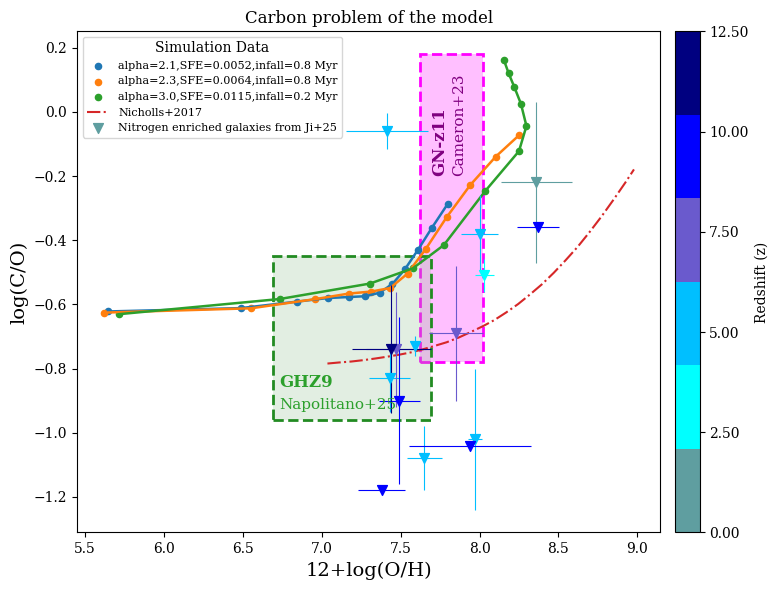

In [94]:
file_paths = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha2.1Log_SFR-0.3SFEN30SFE0.0052Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha2.3Log_SFR-0.3SFEN30SFE0.0064Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/M300_yields/20251212/imfKroupaSTF0.04alpha3.0Log_SFR-0.3SFEN100SFE0.0115Z_0-4.15infall0.0002/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['alpha=2.1,SFE=0.0052,infall=0.8 Myr', 'alpha=2.3,SFE=0.0064,infall=0.8 Myr', 'alpha=3.0,SFE=0.0115,infall=0.2 Myr']
labels.sort()

plot_CO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=2,
    index_y=14,
    title='Carbon problem of the model',
    filename='/Users/adriana_work/Desktop/galIMF/figs/galevo/M300_yields-carbon.png',
)

In [ ]:
#file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN100SFE0.0071Z_0-4.15infall*/chemical_and_SN_evolution.txt")
#file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN100SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt")
file_paths = glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR0.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR0.2SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("/Users/adriana_work/Desktop/galIMF/simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.02alpha3.0Log_SFR-0.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['alpha=3.0,SFE=0.0085,infall=0.8 Myr', 'alpha=2.1,SFE=0.0062,infall=8 Myr', 'alpha=2.3,SFE=0.0061,infall=0.8 Myr']
labels.sort()

plot_CO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=2,
    index_y=11,
    title='used parameters: STF=0.04, SFEN=1 Gyr, $Z_0=1e-6$',
    filename='/Users/adriana_work/Desktop/galIMF/figs/galevo/phd_applications-CO-OH-plot.png',
)